In [1]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar gráficos en línea
%matplotlib inline

## 1. Cargar el dataset

In [3]:
# Cargar el dataset
data = pd.read_csv('Dataset/archive/creditcard.csv')

# Explorar los datos
print(data.head())
print(data.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Entrenar el DataSet

In [4]:
# Tomar una muestra del 10% del dataset
data_sample = data.sample(frac=0.1, random_state=42)
X = data_sample.drop(columns=['Class'])
y = data_sample['Class']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Entrenar un modelo Random Forest optimizado


In [6]:
# Entrenar el modelo con parámetros optimizados
model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

## 4. Evaluación del modelo
Calculamos métricas clave y visualizamos la matriz de confusión.

Accuracy: 0.9990637799882972
F1 Score: 0.5555555555555556

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8538
           1       0.45      0.71      0.56         7

    accuracy                           1.00      8545
   macro avg       0.73      0.86      0.78      8545
weighted avg       1.00      1.00      1.00      8545



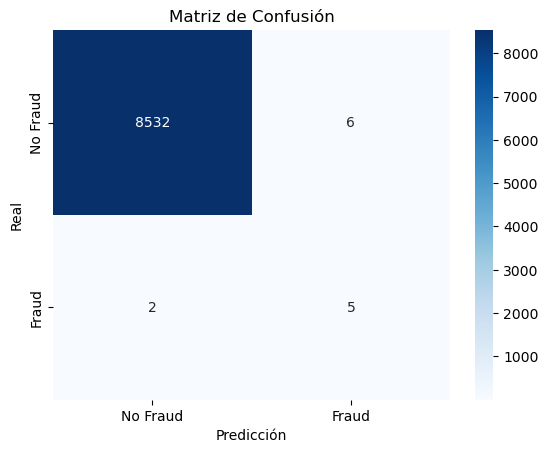

In [7]:
# Predicciones y evaluación
y_pred = model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

print('\nReporte de clasificación:')
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',             xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

## 5. Importancia de características
Visualizamos las características más relevantes según el modelo.


Importancia de características:
   Característica  Importancia
17            V17     0.205180
14            V14     0.158381
16            V16     0.131171
10            V10     0.083309
12            V12     0.076869
4              V4     0.034608
7              V7     0.032412
18            V18     0.030757
3              V3     0.021008
11            V11     0.019928
21            V21     0.018976
9              V9     0.018263
8              V8     0.016315
2              V2     0.014835
22            V22     0.014427
6              V6     0.014408
20            V20     0.013603
5              V5     0.012120
1              V1     0.011608
19            V19     0.010380
26            V26     0.008256
25            V25     0.007180
29         Amount     0.007140
15            V15     0.006595
13            V13     0.006342
23            V23     0.006111
27            V27     0.005690
28            V28     0.005102
24            V24     0.005085
0            Time     0.003942


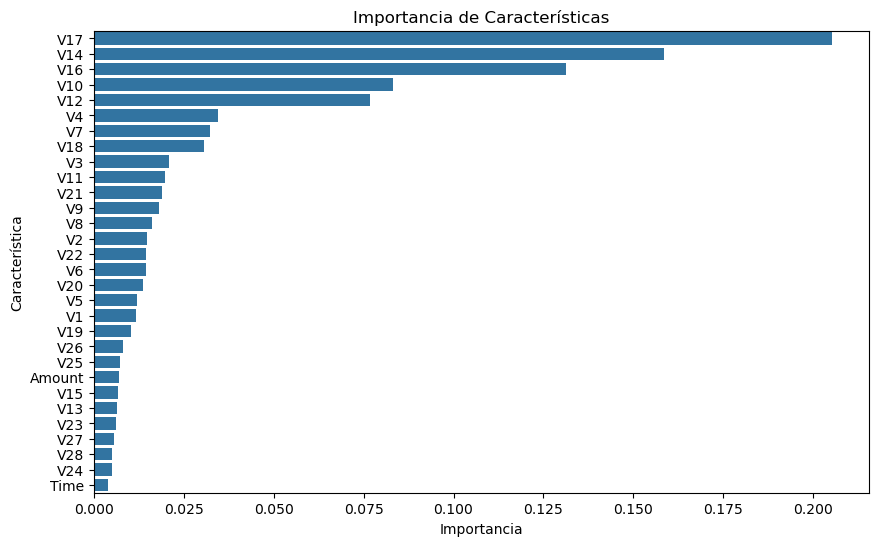

In [8]:
# Importancia de características
feature_importances = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Mostrar las características más importantes
print('\nImportancia de características:')
print(feature_importances)

# Graficar importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=feature_importances)
plt.title('Importancia de Características')
plt.show()